<a href="https://colab.research.google.com/github/RenanNB360/PyTorch/blob/main/GAN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importações

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
torch.__version__

'2.1.0+cu118'

In [2]:
torch.manual_seed(123)

# Etapa 2: Base de dados

In [3]:
transform = transforms.ToTensor()
train = datasets.MNIST(root = '.', train = True, download = True,
                       transform = transform)
train_loader = torch.utils.data.DataLoader(train, batch_size = 256)

100%|██████████| 9912422/9912422 [00:00<00:00, 91585736.10it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 110626204.41it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29065206.08it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 933986.80it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



# Etapa 3: Construção do modelo

In [4]:
class gerador(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense3 = nn.Linear(128, 784)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense3(X))
    X = X.view(X.shape[0], 28, 28)
    return X

# Etapa 4: Construção do discriminador

In [5]:
class discriminador(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(784, 128)
    self.dense1 = nn.Linear(128, 64)
    self.dense2 = nn.Linear(64, 32)
    self.dense3 = nn.Linear(32, 1)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 28 * 28)
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X)
    return X

# Etapa 5: Criação dos objetos

In [6]:
G = gerador()
D = discriminador()

In [7]:
G_optimizer = optim.Adam(G.parameters(), lr = 0.002)
D_optimizer = optim.Adam(D.parameters(), lr = 0.002)

In [8]:
criterion = nn.BCEWithLogitsLoss()

In [9]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [10]:
G.to(device)

gerador(
  (dense0): Linear(in_features=100, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [11]:
D.to(device)

discriminador(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

# Etapa 6: Treinamento do modelo

ÉPOCA 001 finalizada: custo discriminador 0.779385 - custo gerador 3.791408      


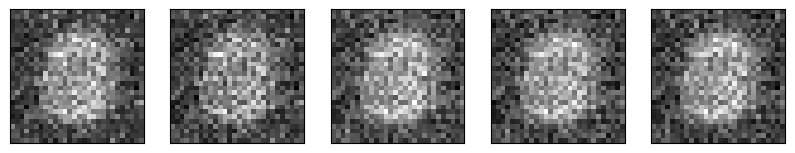

ÉPOCA 002 finalizada: custo discriminador 0.975856 - custo gerador 3.981818      


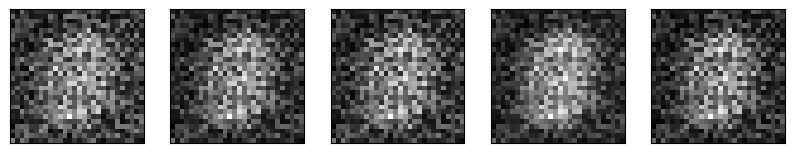

ÉPOCA 003 finalizada: custo discriminador 1.049258 - custo gerador 3.033233      


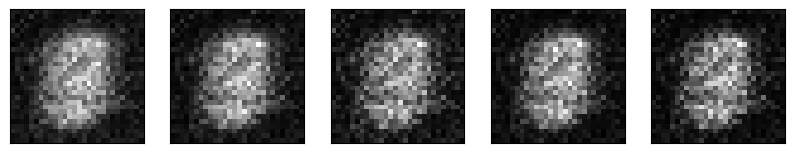

ÉPOCA 004 finalizada: custo discriminador 1.148244 - custo gerador 2.213583      


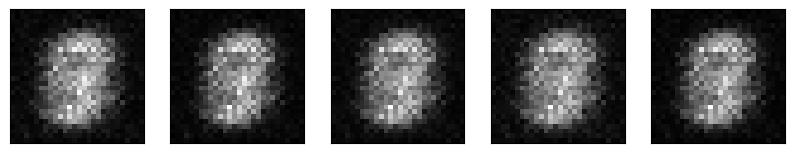

ÉPOCA 005 finalizada: custo discriminador 1.158699 - custo gerador 2.064793      


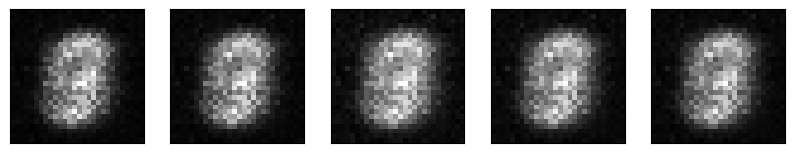

ÉPOCA 006 finalizada: custo discriminador 1.114446 - custo gerador 1.986728      


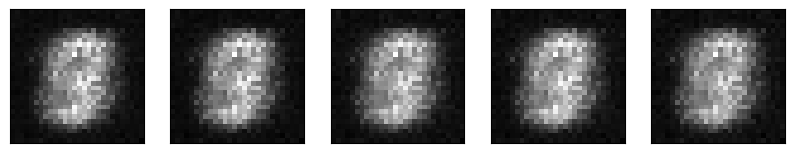

ÉPOCA 007 finalizada: custo discriminador 1.246937 - custo gerador 1.691085      


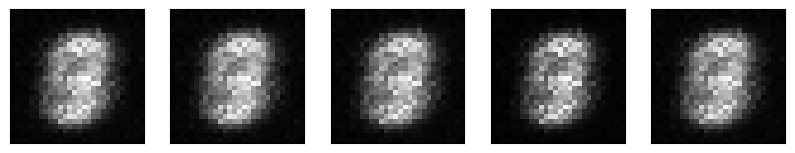

ÉPOCA 008 finalizada: custo discriminador 1.317018 - custo gerador 0.965611      


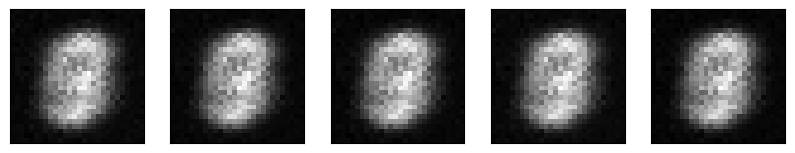

ÉPOCA 009 finalizada: custo discriminador 1.122655 - custo gerador 1.286530      


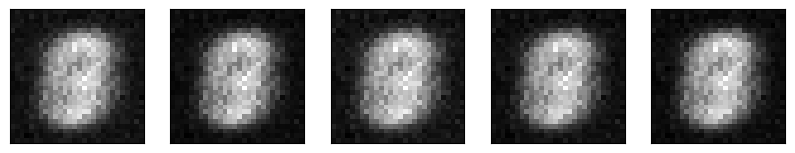

ÉPOCA 010 finalizada: custo discriminador 1.082113 - custo gerador 1.815269      


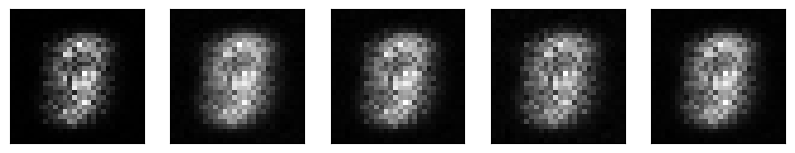

ÉPOCA 011 finalizada: custo discriminador 0.873887 - custo gerador 2.030468      


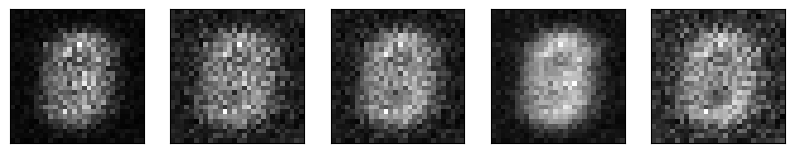

ÉPOCA 012 finalizada: custo discriminador 0.864774 - custo gerador 2.186939      


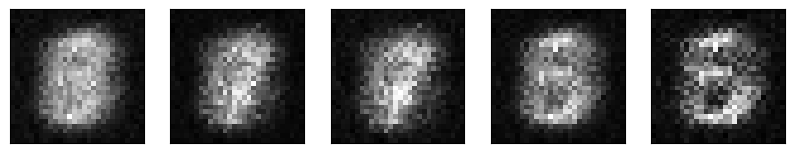

ÉPOCA 013 finalizada: custo discriminador 0.884078 - custo gerador 2.208982      


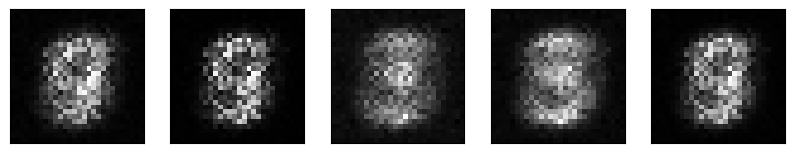

ÉPOCA 014 finalizada: custo discriminador 0.878786 - custo gerador 2.124576      


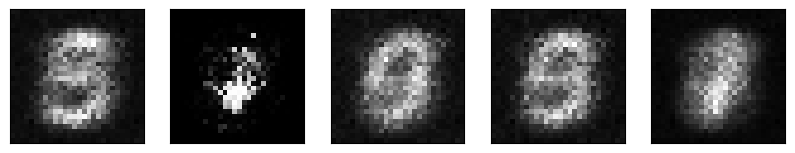

ÉPOCA 015 finalizada: custo discriminador 0.969064 - custo gerador 2.029857      


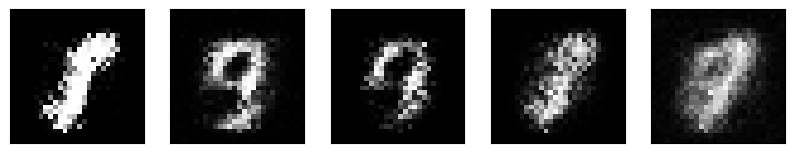

ÉPOCA 016 finalizada: custo discriminador 0.977548 - custo gerador 1.881277      


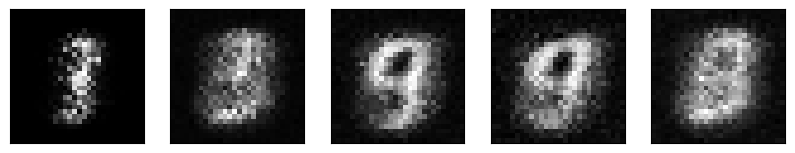

ÉPOCA 017 finalizada: custo discriminador 0.997712 - custo gerador 1.888731      


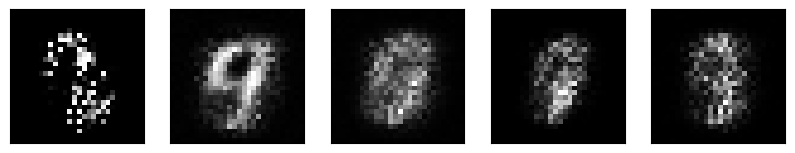

ÉPOCA 018 finalizada: custo discriminador 0.975189 - custo gerador 2.074764      


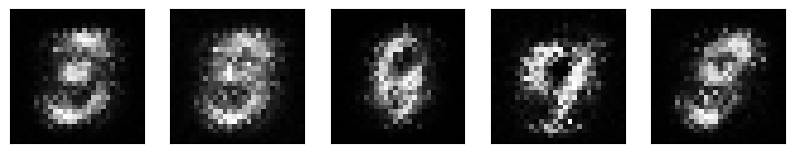

ÉPOCA 019 finalizada: custo discriminador 1.134715 - custo gerador 1.560280      


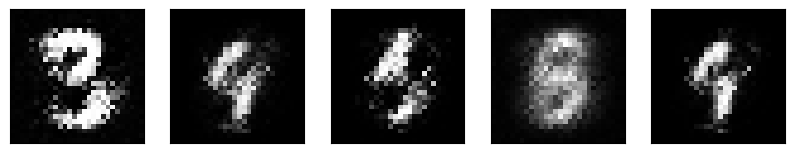

ÉPOCA 020 finalizada: custo discriminador 1.077264 - custo gerador 1.735225      


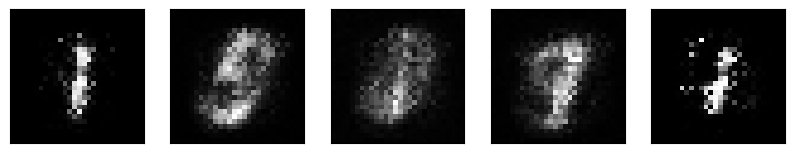

ÉPOCA 021 finalizada: custo discriminador 1.083135 - custo gerador 1.720870      


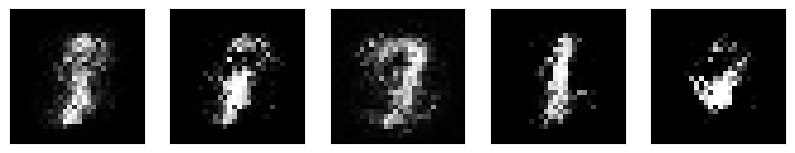

ÉPOCA 022 finalizada: custo discriminador 1.121035 - custo gerador 1.655492      


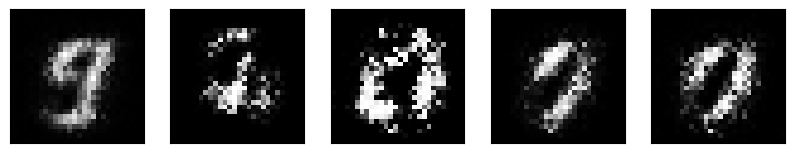

ÉPOCA 023 finalizada: custo discriminador 1.131018 - custo gerador 1.673680      


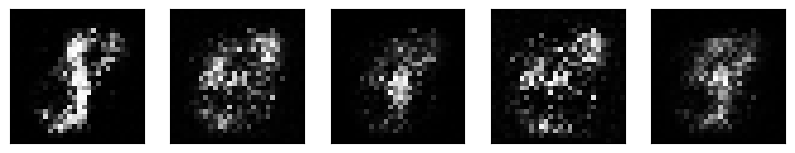

ÉPOCA 024 finalizada: custo discriminador 1.154182 - custo gerador 1.517196      


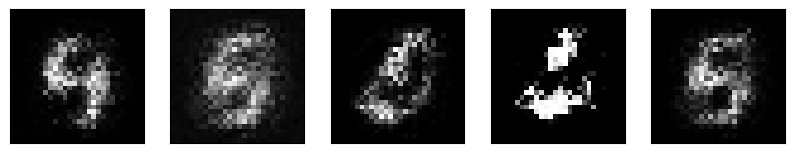

ÉPOCA 025 finalizada: custo discriminador 1.166288 - custo gerador 1.483513      


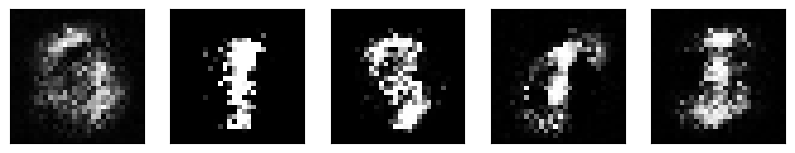

ÉPOCA 026 finalizada: custo discriminador 1.177144 - custo gerador 1.367284      


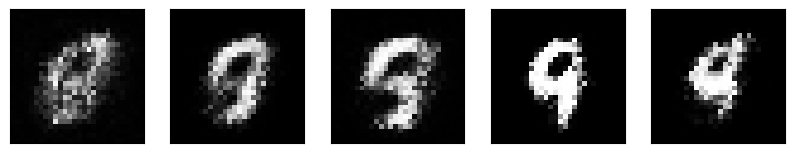

ÉPOCA 027 finalizada: custo discriminador 1.153276 - custo gerador 1.427683      


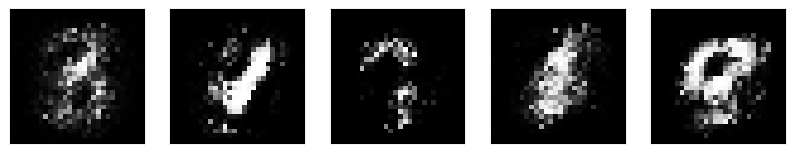

ÉPOCA 028 finalizada: custo discriminador 1.216932 - custo gerador 1.280229      


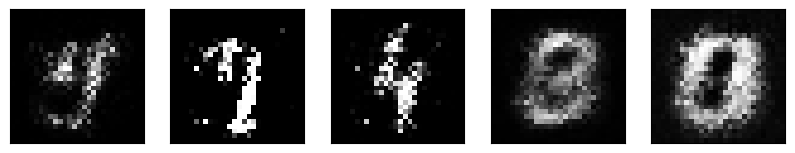

ÉPOCA 029 finalizada: custo discriminador 1.201502 - custo gerador 1.237190      


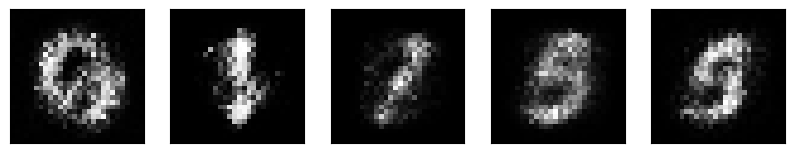

ÉPOCA 030 finalizada: custo discriminador 1.153127 - custo gerador 1.398068      


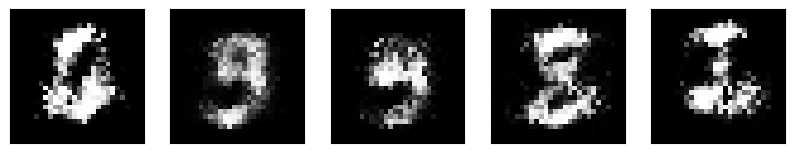

ÉPOCA 031 finalizada: custo discriminador 1.159790 - custo gerador 1.371896      


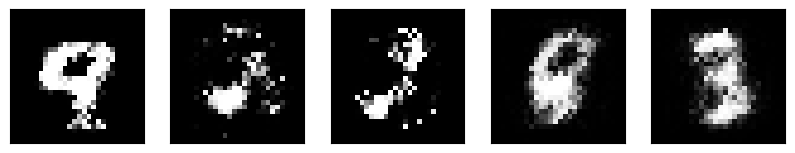

ÉPOCA 032 finalizada: custo discriminador 1.186913 - custo gerador 1.349972      


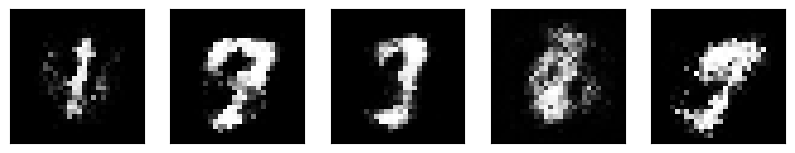

ÉPOCA 033 finalizada: custo discriminador 1.223166 - custo gerador 1.265401      


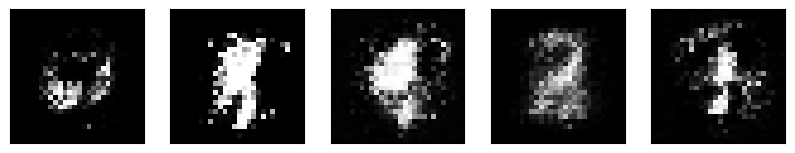

ÉPOCA 034 finalizada: custo discriminador 1.228601 - custo gerador 1.265609      


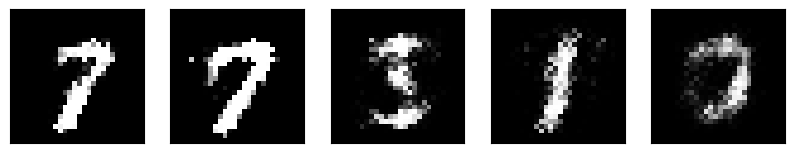

ÉPOCA 035 finalizada: custo discriminador 1.212034 - custo gerador 1.226972      


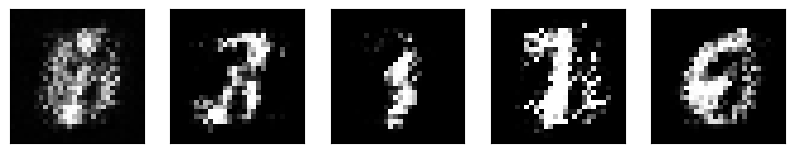

ÉPOCA 036 finalizada: custo discriminador 1.210739 - custo gerador 1.240158      


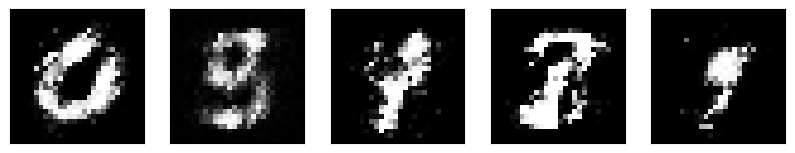

ÉPOCA 037 finalizada: custo discriminador 1.241084 - custo gerador 1.204160      


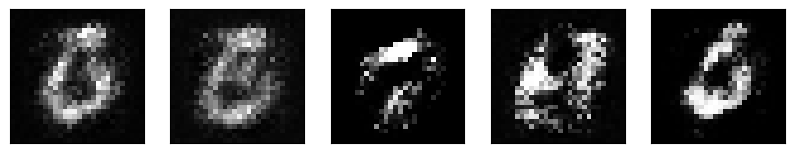

ÉPOCA 038 finalizada: custo discriminador 1.205593 - custo gerador 1.256653      


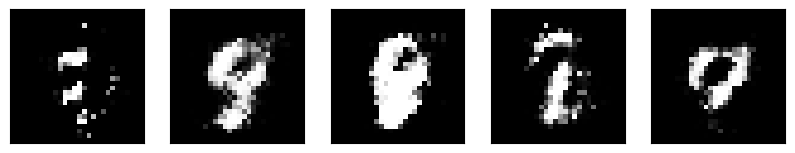

ÉPOCA 039 finalizada: custo discriminador 1.222334 - custo gerador 1.217994      


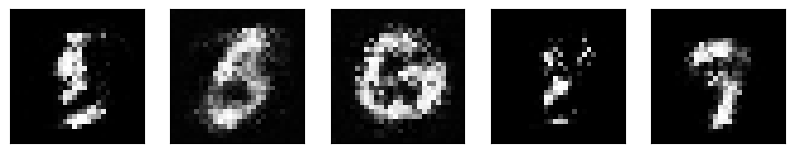

ÉPOCA 040 finalizada: custo discriminador 1.221793 - custo gerador 1.183876      


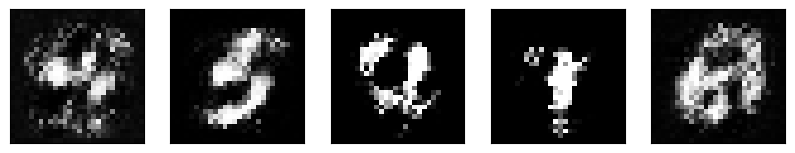

ÉPOCA 041 finalizada: custo discriminador 1.222535 - custo gerador 1.206521      


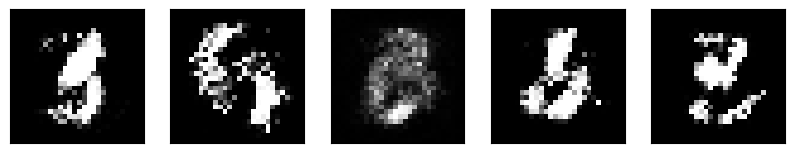

ÉPOCA 042 finalizada: custo discriminador 1.235973 - custo gerador 1.161094      


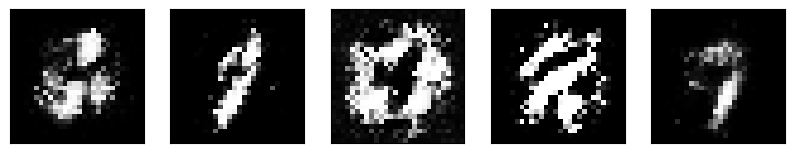

ÉPOCA 043 finalizada: custo discriminador 1.220419 - custo gerador 1.249840      


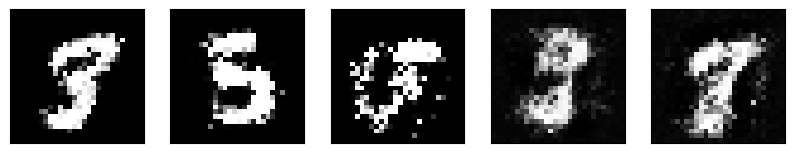

ÉPOCA 044 finalizada: custo discriminador 1.237440 - custo gerador 1.168162      


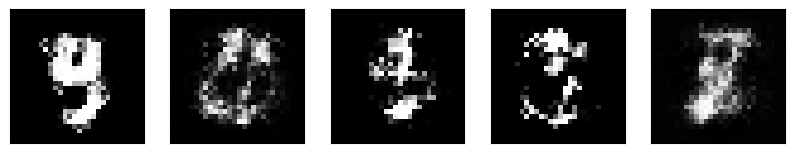

ÉPOCA 045 finalizada: custo discriminador 1.222093 - custo gerador 1.160843      


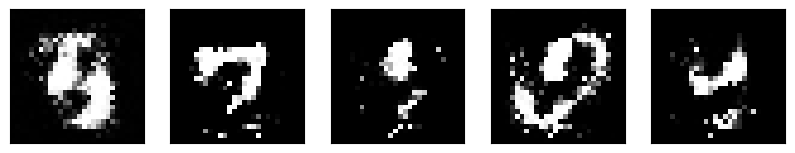

ÉPOCA 046 finalizada: custo discriminador 1.220520 - custo gerador 1.164543      


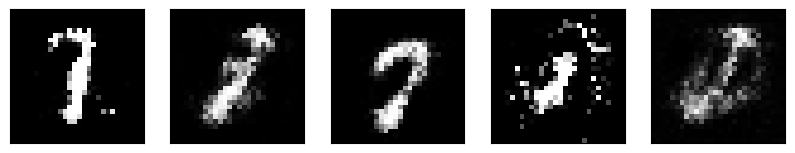

ÉPOCA 047 finalizada: custo discriminador 1.226465 - custo gerador 1.177702      


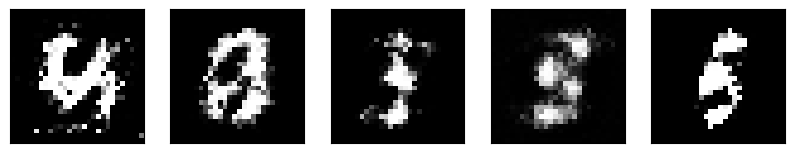

ÉPOCA 048 finalizada: custo discriminador 1.213704 - custo gerador 1.270099      


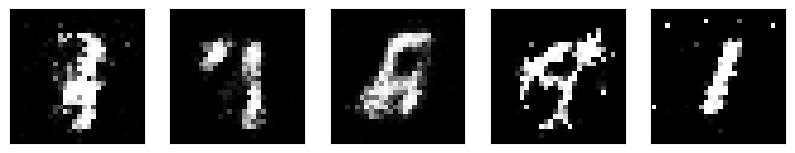

ÉPOCA 049 finalizada: custo discriminador 1.171515 - custo gerador 1.423899      


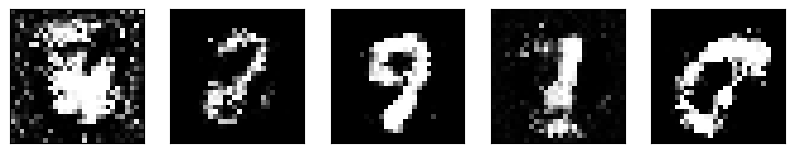

ÉPOCA 050 finalizada: custo discriminador 1.188482 - custo gerador 1.403463      


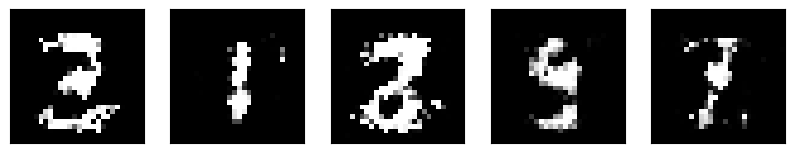

ÉPOCA 051 finalizada: custo discriminador 1.220372 - custo gerador 1.275874      


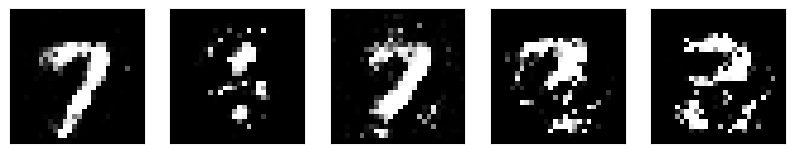

ÉPOCA 052 finalizada: custo discriminador 1.223879 - custo gerador 1.246470      


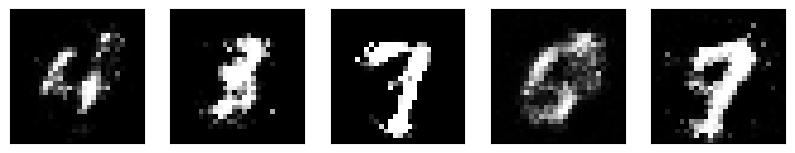

ÉPOCA 053 finalizada: custo discriminador 1.210080 - custo gerador 1.210274      


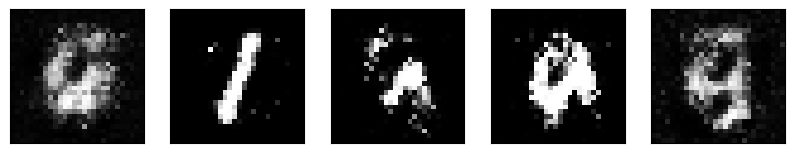

ÉPOCA 054 finalizada: custo discriminador 1.217987 - custo gerador 1.204599      


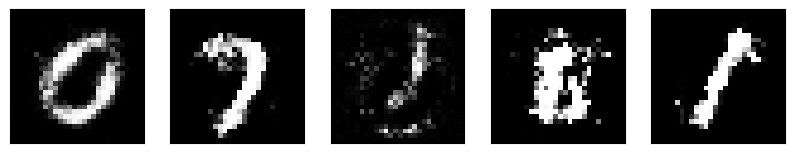

ÉPOCA 055 finalizada: custo discriminador 1.226528 - custo gerador 1.188021      


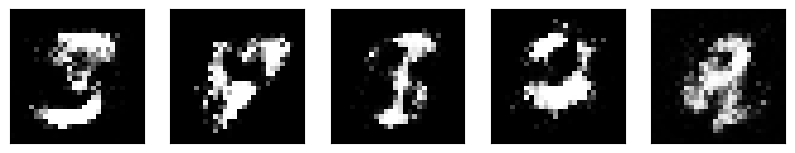

ÉPOCA 056 finalizada: custo discriminador 1.223880 - custo gerador 1.203200      


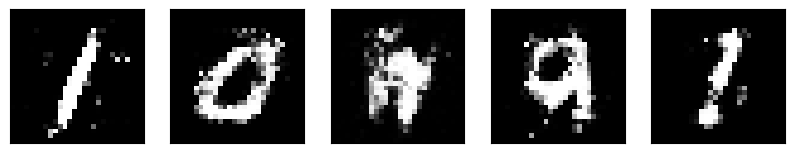

ÉPOCA 057 finalizada: custo discriminador 1.228741 - custo gerador 1.164839      


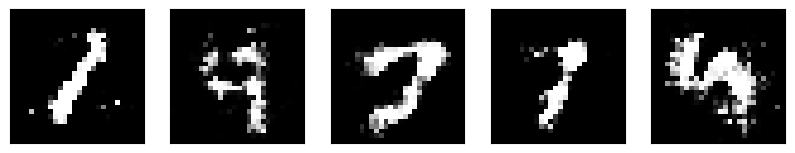

ÉPOCA 058 finalizada: custo discriminador 1.218699 - custo gerador 1.243113      


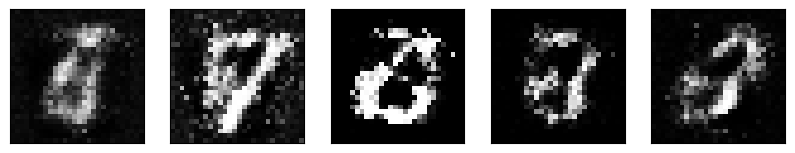

ÉPOCA 059 finalizada: custo discriminador 1.226305 - custo gerador 1.191553      


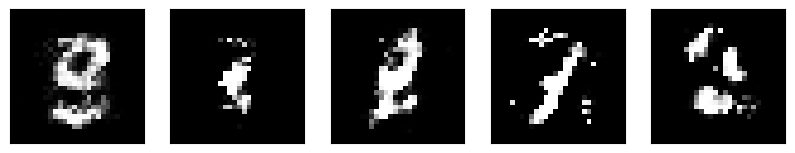

ÉPOCA 060 finalizada: custo discriminador 1.248103 - custo gerador 1.133346      


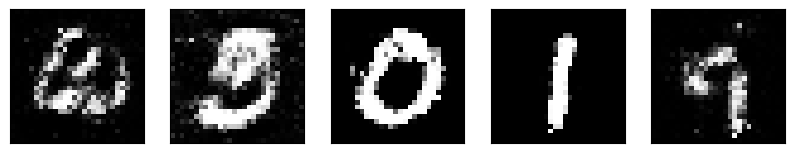

ÉPOCA 061 finalizada: custo discriminador 1.247532 - custo gerador 1.129485      


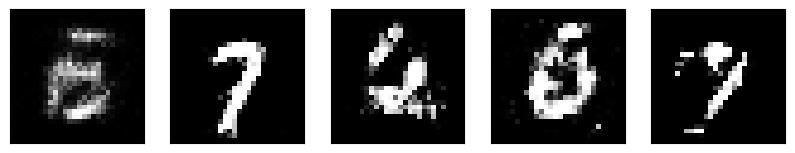

ÉPOCA 062 finalizada: custo discriminador 1.245130 - custo gerador 1.123449      


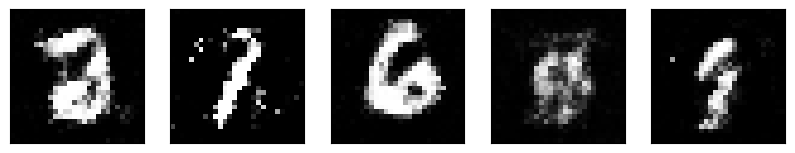

ÉPOCA 063 finalizada: custo discriminador 1.251712 - custo gerador 1.122837      


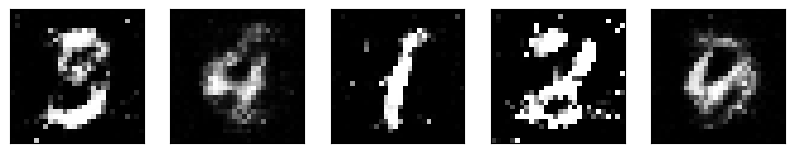

ÉPOCA 064 finalizada: custo discriminador 1.252041 - custo gerador 1.134675      


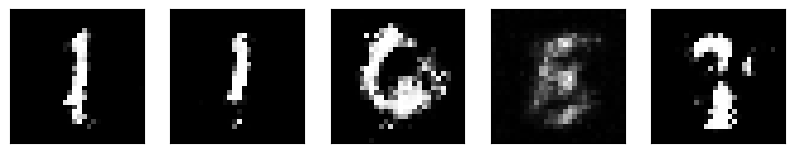

ÉPOCA 065 finalizada: custo discriminador 1.252730 - custo gerador 1.093916      


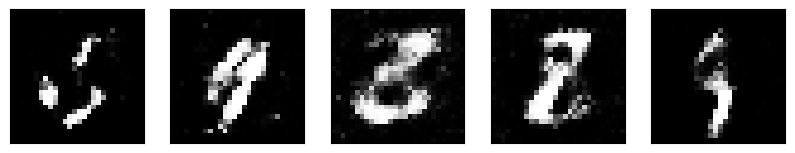

ÉPOCA 066 finalizada: custo discriminador 1.249945 - custo gerador 1.178469      


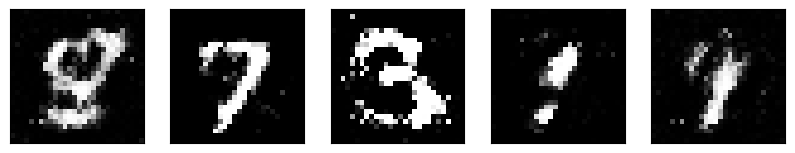

ÉPOCA 067 finalizada: custo discriminador 1.238705 - custo gerador 1.225699      


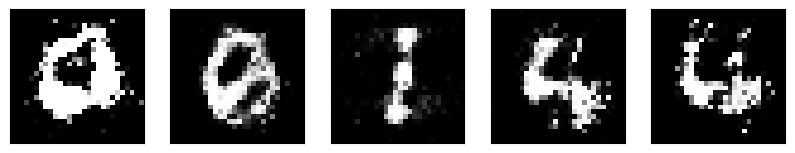

ÉPOCA 068 finalizada: custo discriminador 1.229530 - custo gerador 1.219441      


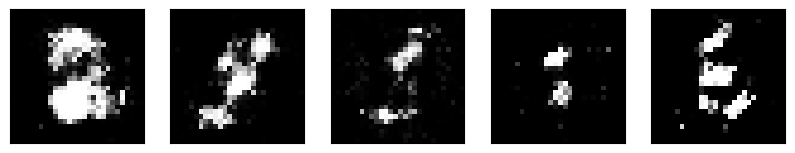

ÉPOCA 069 finalizada: custo discriminador 1.230315 - custo gerador 1.221131      


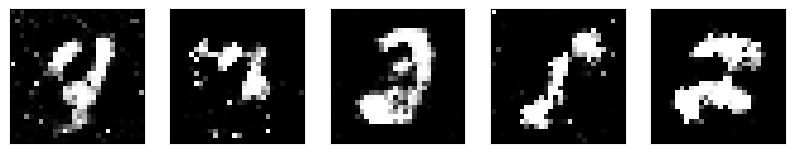

ÉPOCA 070 finalizada: custo discriminador 1.220962 - custo gerador 1.241059      


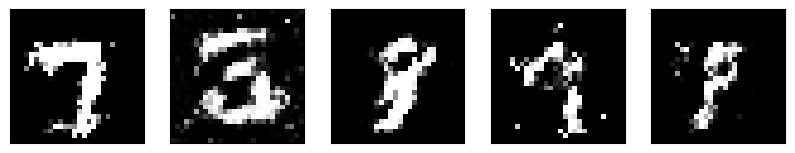

ÉPOCA 071 finalizada: custo discriminador 1.221893 - custo gerador 1.244639      


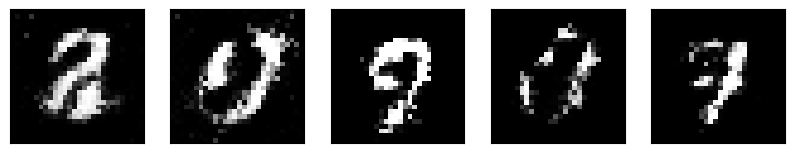

ÉPOCA 072 finalizada: custo discriminador 1.223136 - custo gerador 1.229881      


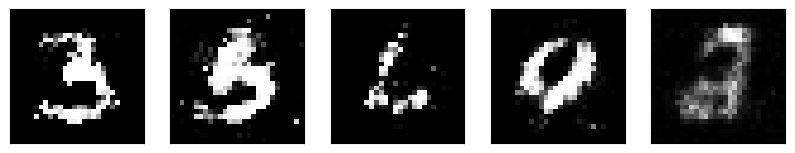

ÉPOCA 073 finalizada: custo discriminador 1.232918 - custo gerador 1.194776      


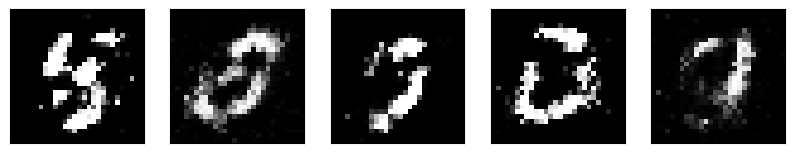

ÉPOCA 074 finalizada: custo discriminador 1.214999 - custo gerador 1.206140      


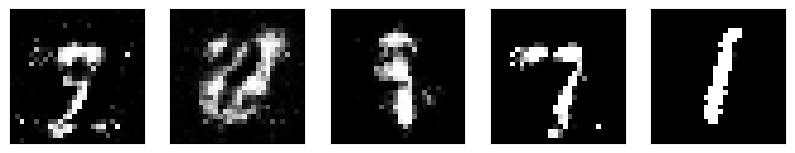

ÉPOCA 075 finalizada: custo discriminador 1.247612 - custo gerador 1.132677      


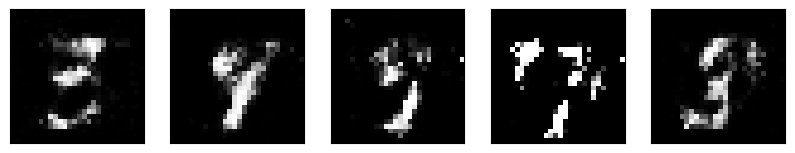

ÉPOCA 076 finalizada: custo discriminador 1.253551 - custo gerador 1.113920      


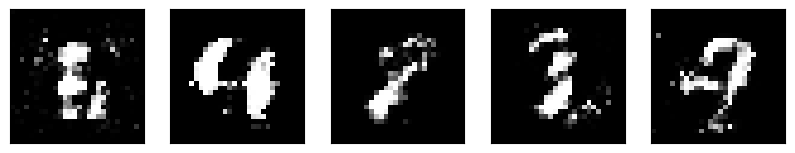

ÉPOCA 077 finalizada: custo discriminador 1.263899 - custo gerador 1.098126      


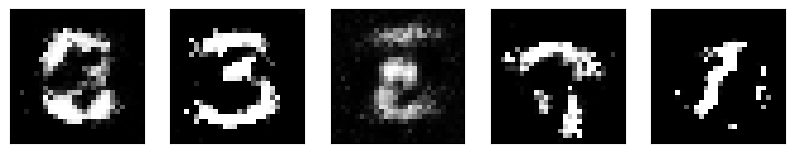

ÉPOCA 078 finalizada: custo discriminador 1.263867 - custo gerador 1.088165      


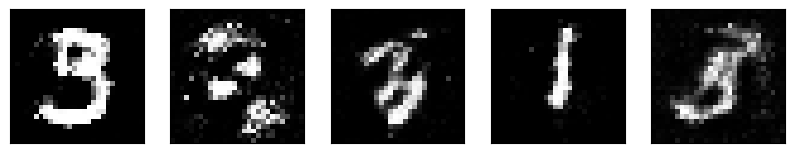

ÉPOCA 079 finalizada: custo discriminador 1.255690 - custo gerador 1.092814      


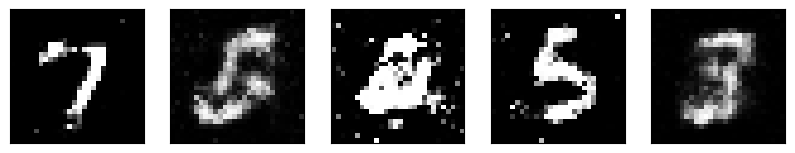

ÉPOCA 080 finalizada: custo discriminador 1.265786 - custo gerador 1.121745      


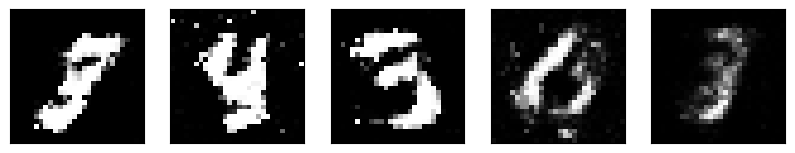

ÉPOCA 081 finalizada: custo discriminador 1.262810 - custo gerador 1.137039      


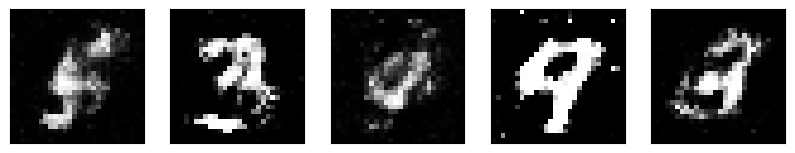

ÉPOCA 082 finalizada: custo discriminador 1.263574 - custo gerador 1.084735      


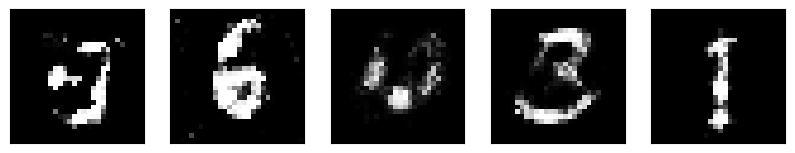

ÉPOCA 083 finalizada: custo discriminador 1.274194 - custo gerador 1.069450      


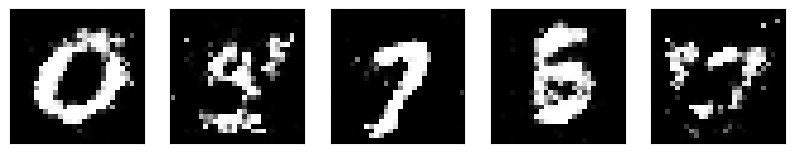

ÉPOCA 084 finalizada: custo discriminador 1.261936 - custo gerador 1.137624      


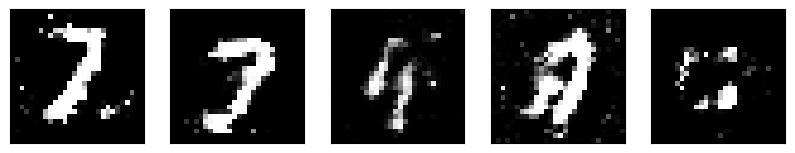

ÉPOCA 085 finalizada: custo discriminador 1.252424 - custo gerador 1.202439      


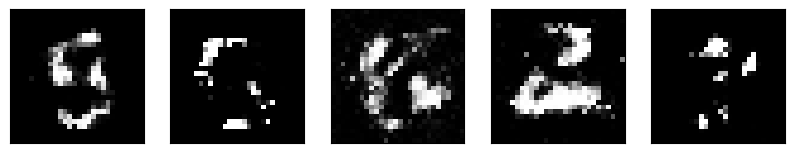

ÉPOCA 086 finalizada: custo discriminador 1.243274 - custo gerador 1.245818      


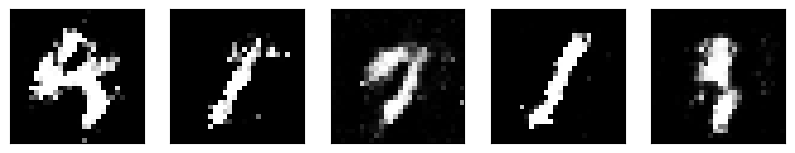

ÉPOCA 087 finalizada: custo discriminador 1.236736 - custo gerador 1.225168      


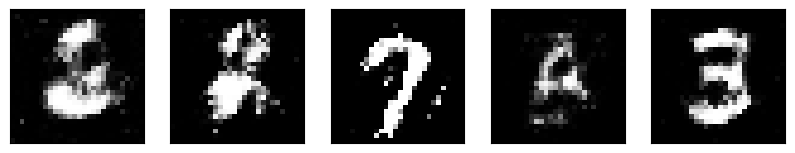

ÉPOCA 088 finalizada: custo discriminador 1.227379 - custo gerador 1.229211      


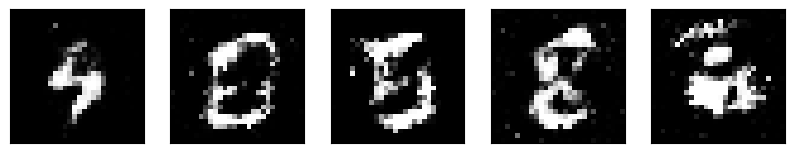

ÉPOCA 089 finalizada: custo discriminador 1.242431 - custo gerador 1.166424      


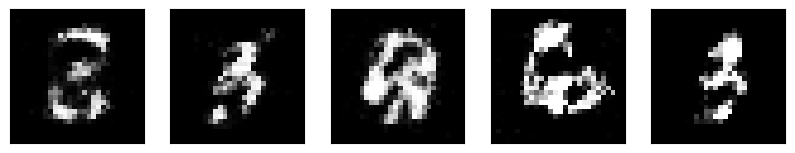

ÉPOCA 090 finalizada: custo discriminador 1.250231 - custo gerador 1.145918      


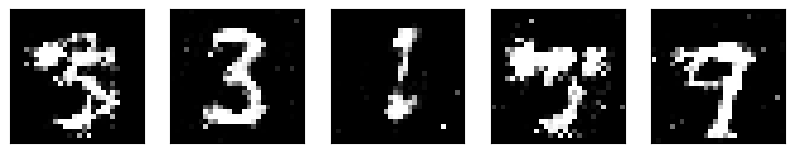

ÉPOCA 091 finalizada: custo discriminador 1.236121 - custo gerador 1.179721      


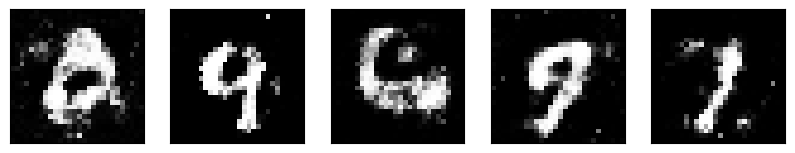

ÉPOCA 092 finalizada: custo discriminador 1.254154 - custo gerador 1.155452      


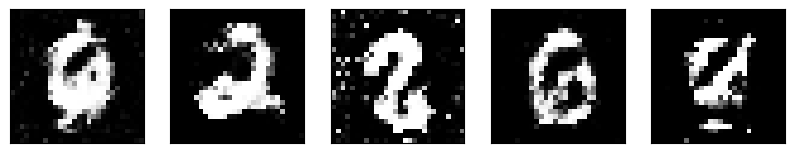

ÉPOCA 093 finalizada: custo discriminador 1.257271 - custo gerador 1.157508      


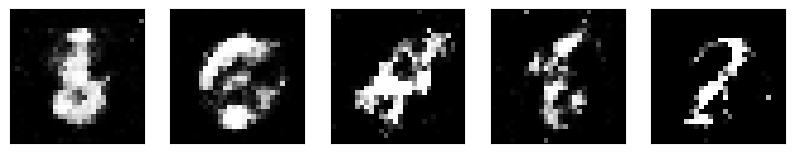

ÉPOCA 094 finalizada: custo discriminador 1.238031 - custo gerador 1.148600      


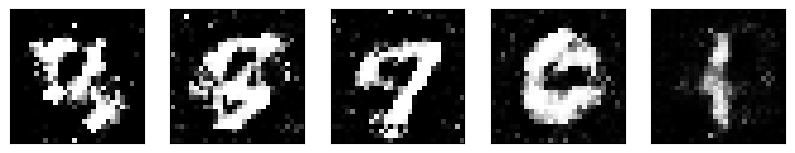

ÉPOCA 095 finalizada: custo discriminador 1.248238 - custo gerador 1.109275      


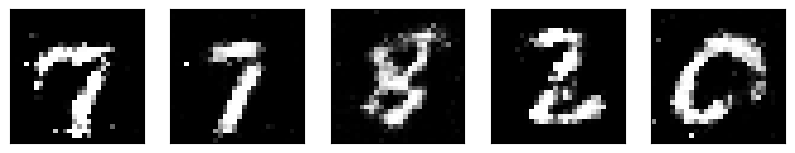

ÉPOCA 096 finalizada: custo discriminador 1.254143 - custo gerador 1.156850      


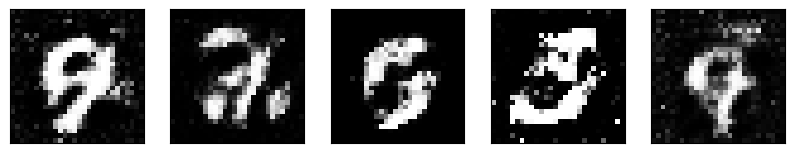

ÉPOCA 097 finalizada: custo discriminador 1.247751 - custo gerador 1.111525      


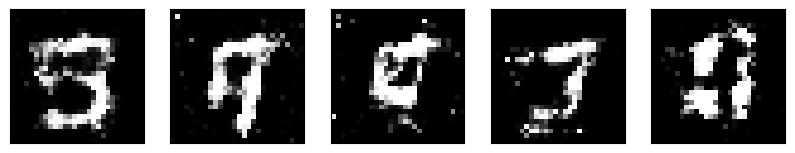

ÉPOCA 098 finalizada: custo discriminador 1.242803 - custo gerador 1.124570      


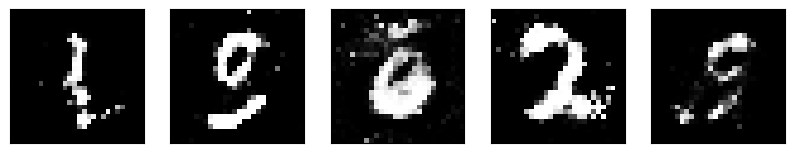

ÉPOCA 099 finalizada: custo discriminador 1.264278 - custo gerador 1.071905      


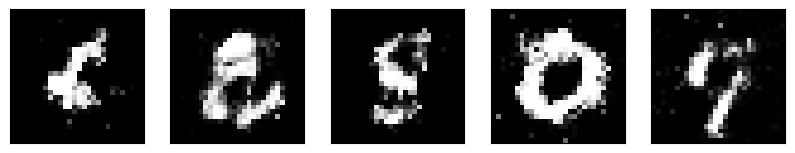

ÉPOCA 100 finalizada: custo discriminador 1.273144 - custo gerador 1.051974      


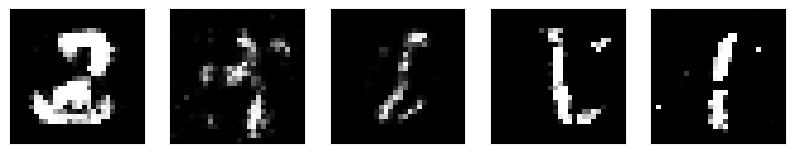

In [12]:
for epoch in range(100):
  D_running_loss = 0
  G_running_loss = 0

  for i, (imagens_reais, _) in enumerate(train_loader):
    batch_size = imagens_reais.size(0)
    imagens_reais = imagens_reais * 2 - 1
    imagens_reais = imagens_reais.to(device)

    # Treinamento do gerador
    G_optimizer.zero_grad()
    ruido = np.random.uniform(low = -1., high=1., size = (batch_size, 100))
    ruido = torch.from_numpy(ruido).float().to(device)
    imagens_falsas = G.forward(ruido)
    outputs_falsas = D.forward(imagens_falsas)
    labels_falsas = torch.ones(batch_size).to(device)
    G_loss = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)
    G_loss.backward()
    G_optimizer.step()

    # Treinamento do discriminador
    D_optimizer.zero_grad()
    outputs_reais = D.forward(imagens_reais)
    labels_reais = (torch.ones(batch_size) * 0.9).to(device)
    D_loss_reais = criterion(outputs_reais.view(*labels_reais.shape), labels_reais)

    ruido = np.random.uniform(-1., 1., (batch_size, 100))
    ruido = torch.from_numpy(ruido).float().to(device)
    imagens_falsas = G.forward(ruido)
    outputs_falsas = D.forward(imagens_falsas)
    labels_falsas = torch.zeros(batch_size).to(device)
    D_loss_falsas = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

    D_loss = D_loss_reais + D_loss_falsas
    D_loss.backward()
    D_optimizer.step()

    D_running_loss += D_loss.item()
    G_running_loss += G_loss.item()

    print('\rÉpoca {:03d} - Loop {:3d} de {:3d}: custo discriminador {:03.5f} - custo gerador {:03.5f}'.format(epoch + 1, i + 1, len(train_loader), D_loss.item(), G_loss.item()), end = '\r')

  D_running_loss /= len(train_loader)
  G_running_loss /= len(train_loader)
  print('ÉPOCA {:03d} finalizada: custo discriminador {:03.6f} - custo gerador {:03.6f}      '.format(epoch + 1, D_running_loss, G_running_loss))

  fix, ax = plt.subplots(1, 5, figsize = (10, 5))
  for i in range(5):
    ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
  plt.show()

# Etapa 7: Criação de novas imagens

In [13]:
ruido = np.random.uniform(-1., 1., (20, 100))

In [15]:
ruido[0]

array([-0.24447275, -0.17781042,  0.99639383,  0.4663652 , -0.73232457,
       -0.47011911, -0.59423177,  0.50484654, -0.19158171, -0.95481158,
       -0.90683222, -0.61127239, -0.88498312, -0.03522117,  0.30302143,
        0.05555938, -0.48173552, -0.79598311,  0.55559375, -0.51296426,
        0.92322556, -0.26275424, -0.37635545, -0.41168617, -0.29367681,
        0.56856644, -0.40919229, -0.45371544,  0.88704379, -0.19093735,
        0.17009639,  0.71211851,  0.73135359, -0.03477533,  0.72814134,
        0.98009343,  0.46354853, -0.42853243,  0.42126609, -0.79917534,
       -0.10133814,  0.21460937,  0.90508327,  0.27506619,  0.43815532,
       -0.32213872,  0.37838887, -0.68749466, -0.61553076, -0.71070896,
        0.92790399, -0.71678773, -0.10206361,  0.76216559, -0.4136301 ,
        0.40413635, -0.66608618,  0.39443888, -0.51295461,  0.33322356,
       -0.00820636,  0.31975775, -0.14949449, -0.57405853,  0.44082841,
        0.73204511, -0.583666  ,  0.65639531,  0.84236539, -0.05

In [16]:
ruido = torch.from_numpy(ruido).float().to(device)

In [17]:
type(ruido)

torch.Tensor

In [18]:
G.eval()
previsao = G.forward(ruido)

In [20]:
previsao = previsao.cpu().detach().numpy()

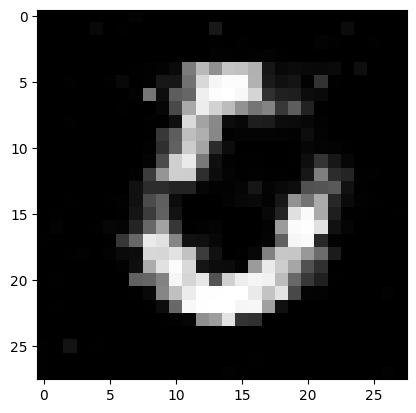

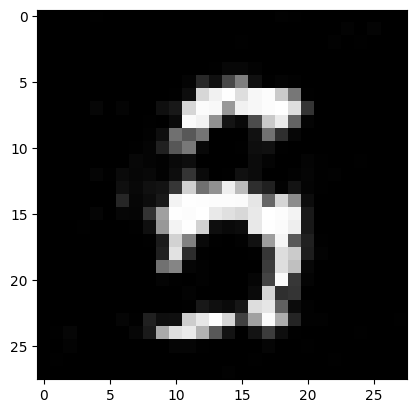

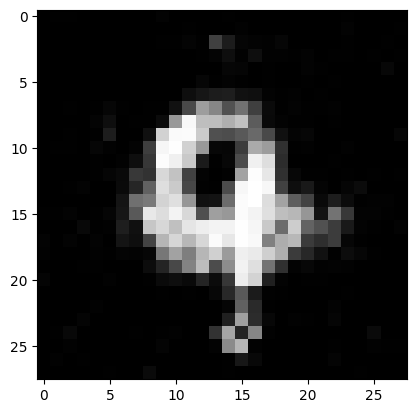

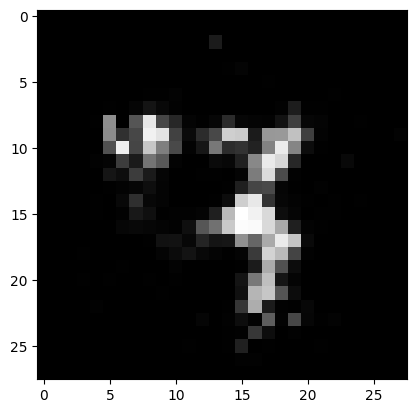

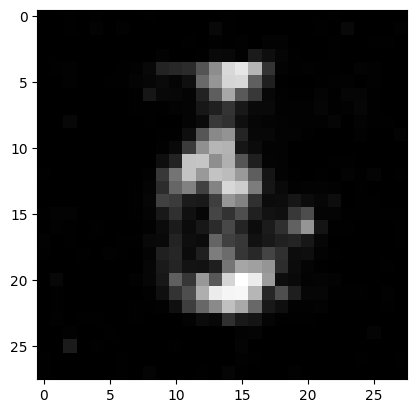

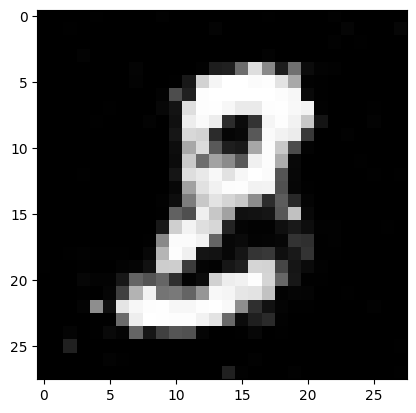

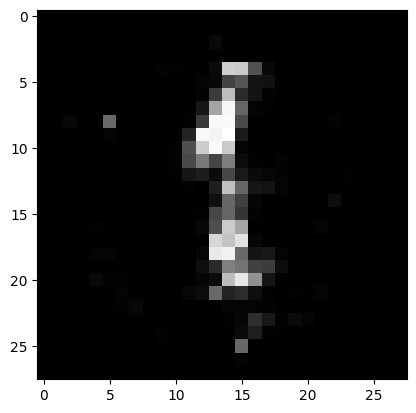

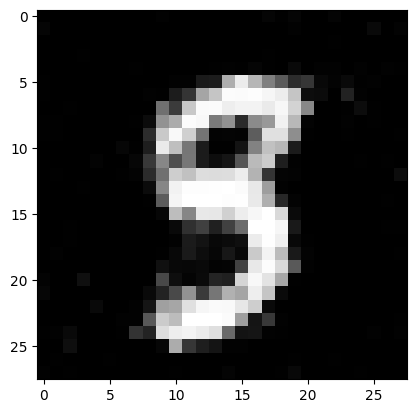

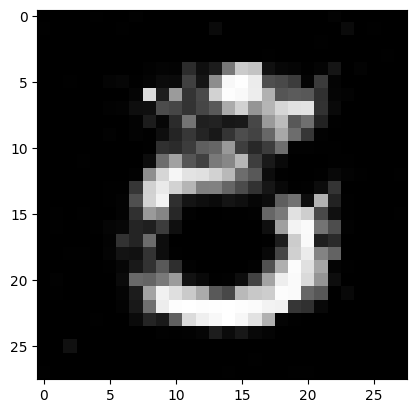

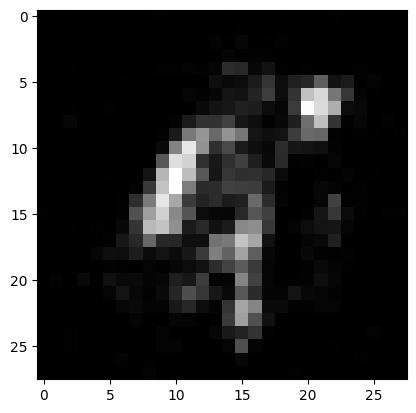

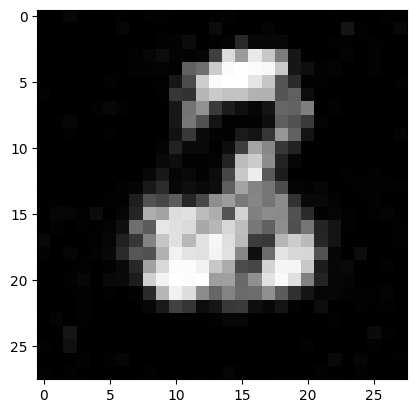

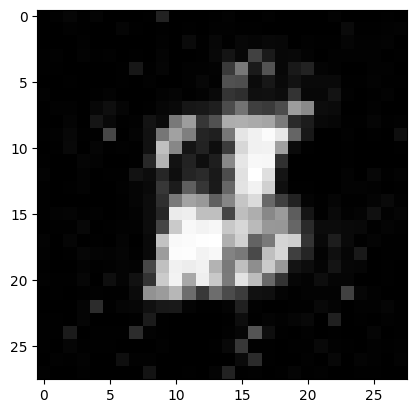

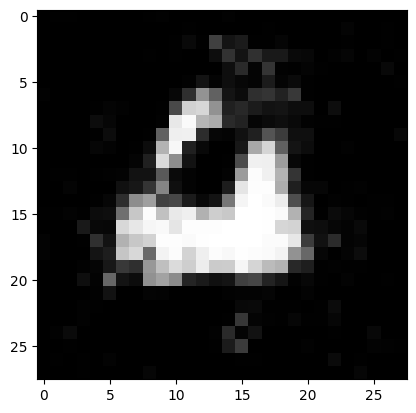

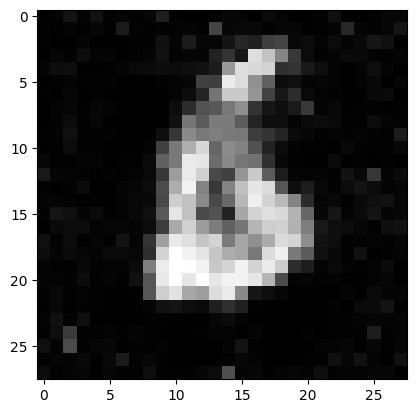

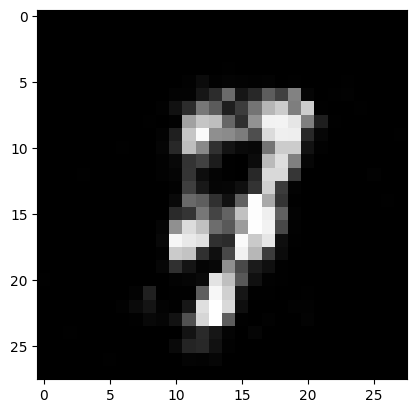

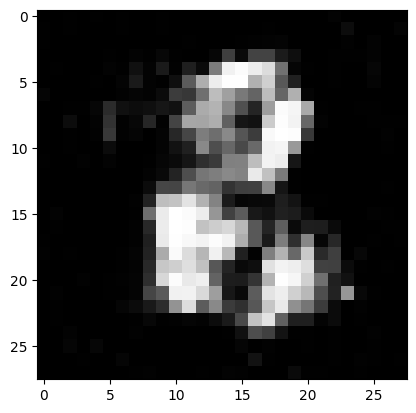

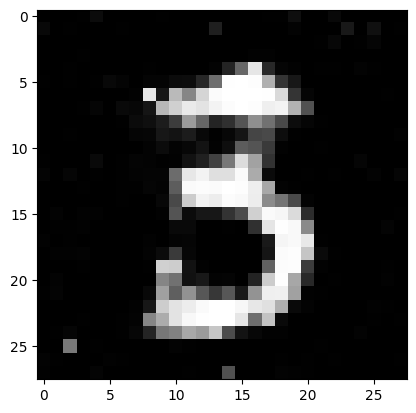

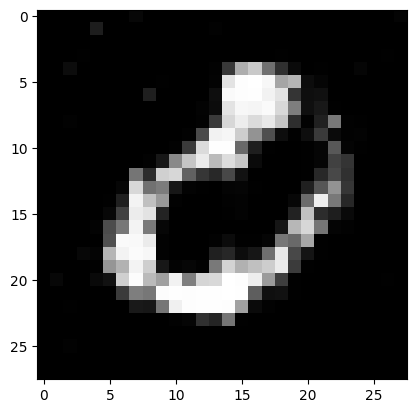

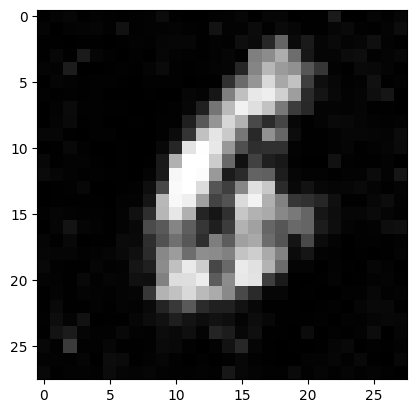

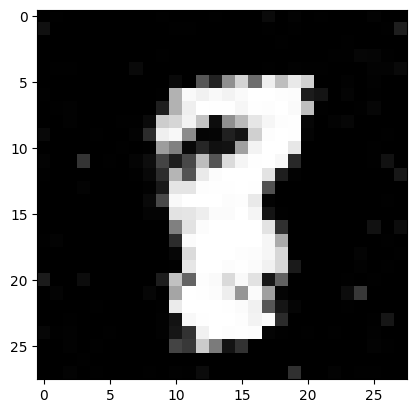

In [22]:
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :].squeeze(), cmap = 'gray')
  plt.show()